In [1]:
import sys, os
jp = os.path.join
import datetime
import pandas as pd
import numpy as np
from  scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.functions as T
S = F.col

In [3]:
spark = SparkSession.builder.master('local[*]').getOrCreate()
print(spark.version)

2.4.0


In [4]:
df = spark.createDataFrame(pd.read_csv('./device_failure_fixed.csv', encoding='utf-8'))
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- device: string (nullable = true)
 |-- failure: long (nullable = true)
 |-- attribute1: long (nullable = true)
 |-- attribute2: long (nullable = true)
 |-- attribute3: long (nullable = true)
 |-- attribute4: long (nullable = true)
 |-- attribute5: long (nullable = true)
 |-- attribute6: long (nullable = true)
 |-- attribute7: long (nullable = true)
 |-- attribute8: long (nullable = true)
 |-- attribute9: long (nullable = true)



In [5]:
stats_df = df.groupBy('device').agg(
    F.count('date').alias('Nevent'),
    F.min('date').alias('Start'),
    F.max('date').alias('End'),
    (F.sum('failure')/F.count('failure')).alias("Failure_rate"),
    F.sum('failure').alias('Nfailure')
    
)
stats_df.sort('Nfailure', ascending=False) \
.show()

+--------+------+----------+----------+--------------------+--------+
|  device|Nevent|     Start|       End|        Failure_rate|Nfailure|
+--------+------+----------+----------+--------------------+--------+
|S1F0GPFZ|   205|2015-01-01|2015-07-24|0.004878048780487805|       1|
|Z1F0B4XZ|   118|2015-01-01|2015-06-14| 0.00847457627118644|       1|
|S1F0S4T6|    84|2015-01-01|2015-03-25|0.011904761904761904|       1|
|S1F0RRB1|     5|2015-01-01|2015-01-05|                 0.2|       1|
|Z1F1RJFA|   124|2015-01-01|2015-05-04|0.008064516129032258|       1|
|S1F023H2|    19|2015-01-01|2015-01-19| 0.05263157894736842|       1|
|W1F0X4FC|    23|2015-01-01|2015-01-23|0.043478260869565216|       1|
|W1F0VDH2|    33|2015-01-01|2015-02-02|0.030303030303030304|       1|
|S1F0J5JH|   193|2015-01-01|2015-07-12|0.005181347150259...|       1|
|Z1F0LVPW|    19|2015-01-01|2015-01-19| 0.05263157894736842|       1|
|W1F11ZG9|   229|2015-01-01|2015-08-17|0.004366812227074236|       1|
|S1F13H80|   107|201

In [11]:
print(stats_df.agg(
    F.count('device'), F.min('Nevent'), F.max('Nevent'),
    F.min('Nfailure'), F.max('Nfailure'),
    F.min('Failure_rate'), F.max('Failure_rate'),
).toPandas().T)

                        0
count(device)      1168.0
min(Nevent)           3.0
max(Nevent)         304.0
min(Nfailure)         0.0
max(Nfailure)         1.0
min(Failure_rate)     0.0
max(Failure_rate)     0.2


In [7]:
df.agg(
    F.count('date').alias('N'),
    F.sum('failure')
).show()

+------+------------+
|     N|sum(failure)|
+------+------------+
|124494|         106|
+------+------------+



In [12]:
106/124494

0.000851446656063746

In [195]:
from scipy.stats import spearmanr, pearsonr
for k in range(1,10):
    for j in range(k+1, 10):
        print("%d, %d" % (k, j))
        print(spearmanr(pdf['attribute%d'%k].values, pdf['attribute%d'%j].values))
        print(pearsonr(pdf['attribute%d'%k].values, pdf['attribute%d'%j].values))

1, 2
SpearmanrResult(correlation=-0.001246276039267708, pvalue=0.6601340152867303)
(-0.0042499162839172155, 0.13373885255836346)
1, 3
SpearmanrResult(correlation=0.002439452799363551, pvalue=0.3893911604496325)
(0.003701485279721477, 0.19154827567007995)
1, 4
SpearmanrResult(correlation=0.001606242884915775, pvalue=0.5708930738859723)
(0.001835788259867554, 0.5171607627405174)
1, 5
SpearmanrResult(correlation=-0.005341063207023213, pvalue=0.05949472262930639)
(-0.00337588189060935, 0.23360344982573214)
1, 6
SpearmanrResult(correlation=-0.0026885463085628, pvalue=0.3428184946913282)
(-0.0015219712780276476, 0.5912656731270711)
1, 7
SpearmanrResult(correlation=-0.0024904571765687108, pvalue=0.37955410979475057)
(0.00015067578564645592, 0.9576016614663739)
1, 8
SpearmanrResult(correlation=-0.0024904571765687108, pvalue=0.37955410979475057)
(0.00015067578564645592, 0.9576016614663739)
1, 9
SpearmanrResult(correlation=-0.0034126283227038593, pvalue=0.2285535563752409)
(0.0011207496645715056

In [189]:
pdf['attribute7'].values

array([0, 0, 0, ..., 0, 0, 0])

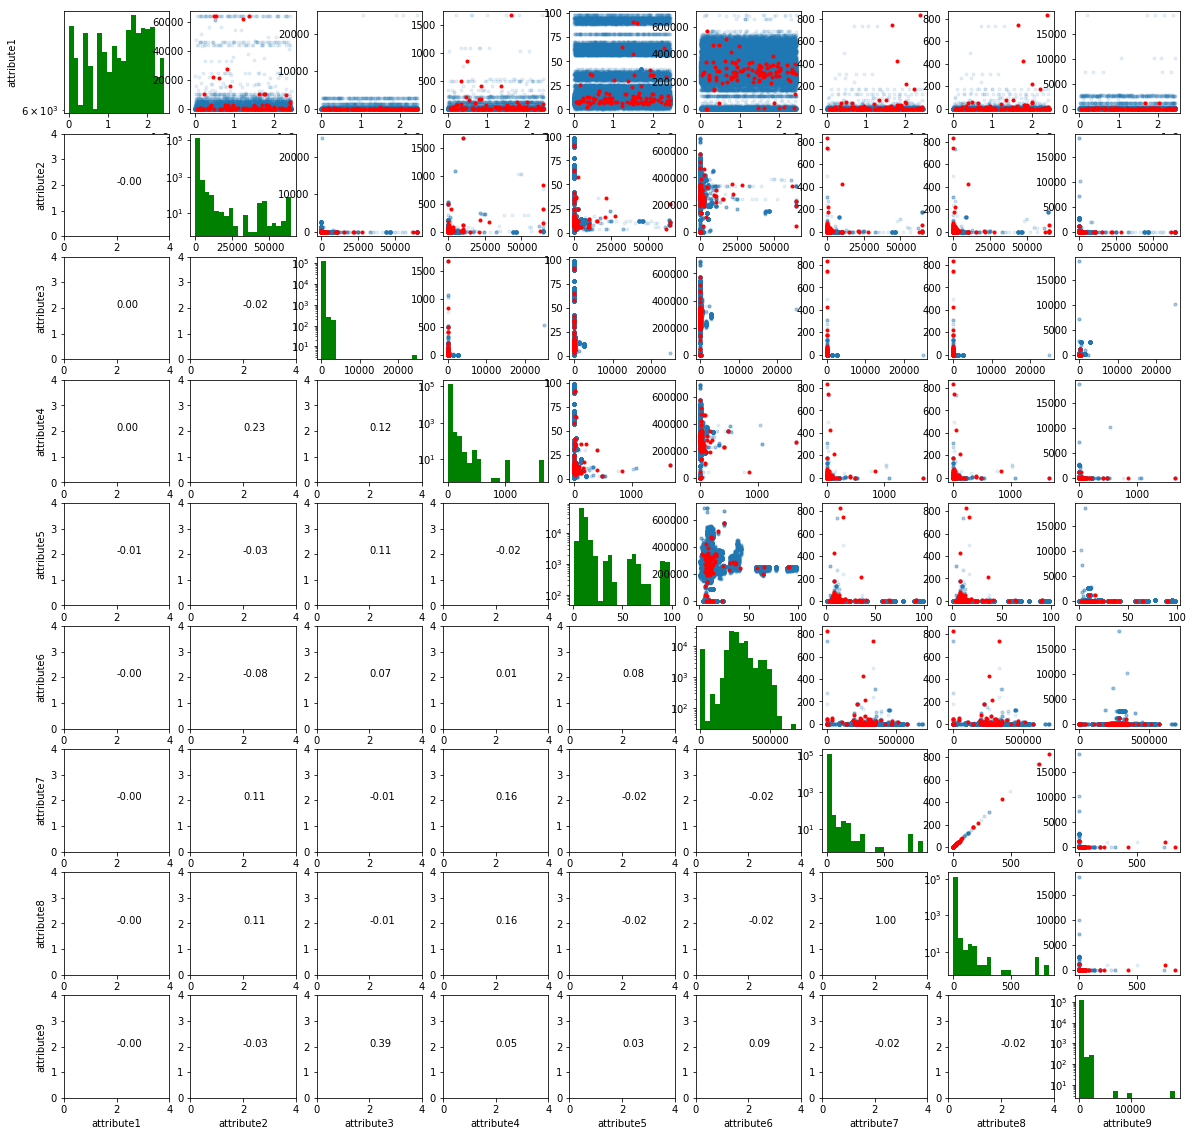

In [16]:
%matplotlib inline
from importlib import reload
import project
reload(project)
from project import scatter_plot_matrix
pdf = pd.read_csv('./device_failure_fixed.csv', encoding='utf-8')
fig = scatter_plot_matrix(pdf, label_col='failure')
fig.savefig('reportfigs/scatter-plot-matrix.png')
fig.show()


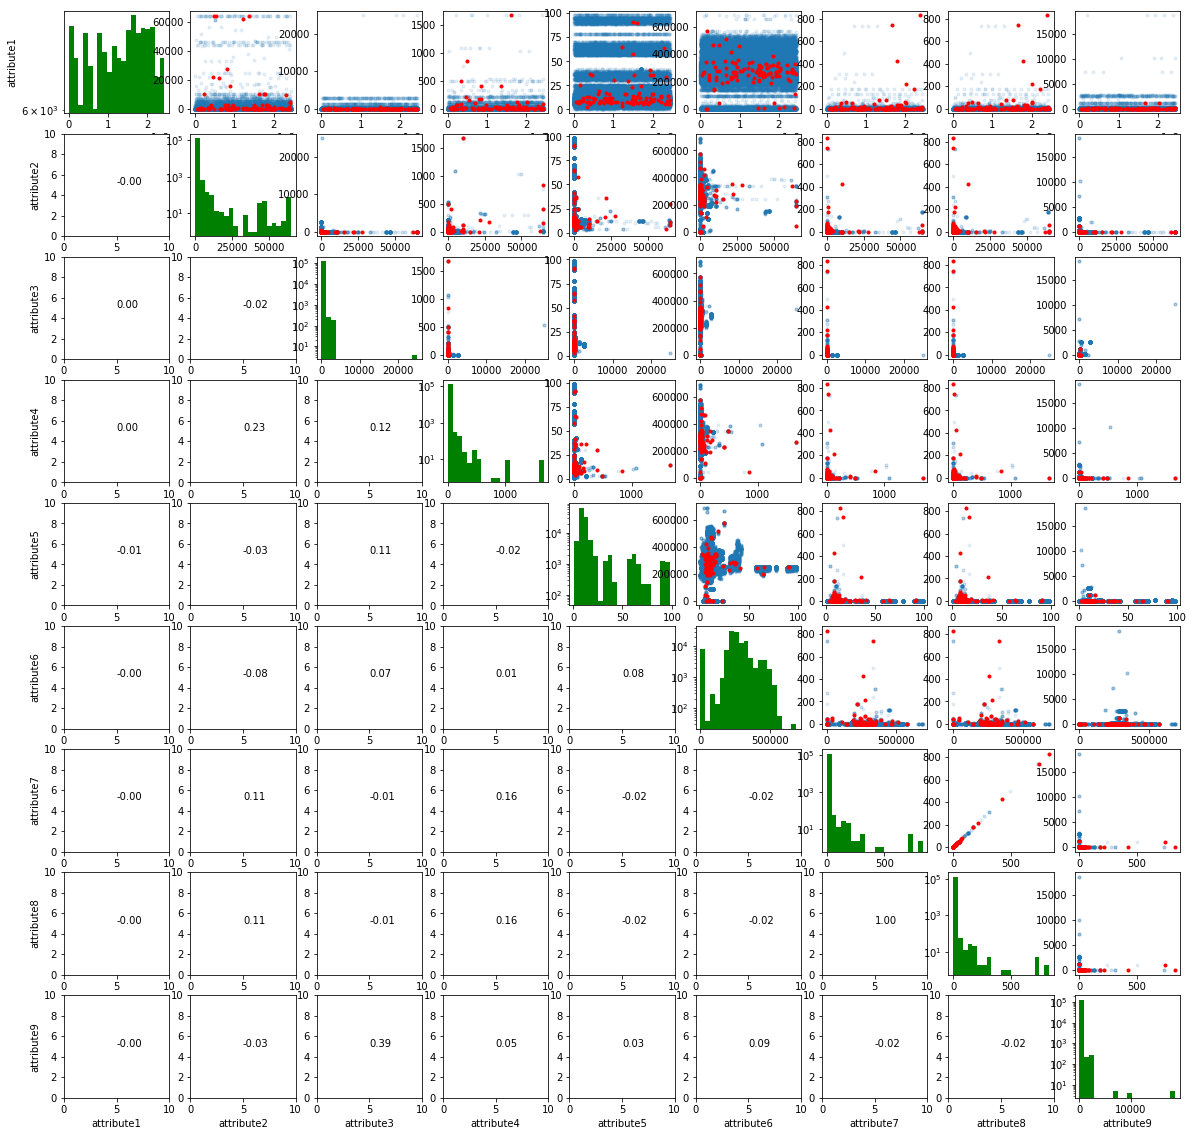

In [202]:
from scipy.stats import spearmanr, pearsonr

pdf = pd.read_csv('./device_failure_fixed.csv', encoding='utf-8')
pos = pdf[pdf.failure==1]
neg = pdf[pdf.failure==0]
plt.figure(figsize=(20,20))
for k in range(1,10):
    for j in range(1,10):
        plt.subplot(9,9,(k-1)*9+j)
        if j>k:
            x = neg['attribute%d'%k]
            y = neg['attribute%d'%j]
            plt.plot(x,y, '.', alpha=0.1)
            x = pos['attribute%d'%k]
            y = pos['attribute%d'%j]
            plt.plot(x,y, '.', c='red', alpha=1)
        elif j<k:
            plt.xlim(0,10)
            plt.ylim(0,10)
            corr, _ = spearmanr(pdf['attribute%d'%k].values, pdf['attribute%d'%j].values)
            #pearsonr(pdf['attribute%d'%k].values, pdf['attribute%d'%j].values)
            plt.text(5,5,"%.2f" % corr)
        else:
            plt.hist(pdf['attribute%d'%k], bins=20, color='green', log=True)
        if j==1:
            plt.ylabel('attribute%d'%k)
        if k==9:
            plt.xlabel('attribute%d'%j)

In [18]:
df.groupby('device').agg()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [34]:
from  sklearn.model_selection import train_test_split
cols = [ 'attribute%d'%k for k in range(1,10) ]
y = pdf['failure']
X = pdf[cols].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(83410, 9)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [37]:
 clf = DecisionTreeClassifier(max_depth=5)

In [43]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_hat = clf.predict(X_test)
pd.DataFrame({'act': y_test, 'pred': y_hat}).pivot_table('act', 'pred')

,act
pred,
0,0.00073
1,0.25000


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y_hat = clf.predict(X_train)
confusion_matrix(y_train, y_hat)

array([[83335,     0],
       [   65,    10]])

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [59]:
pd.DataFrame({'y': y_res, 'v':1}).groupby('y').sum()

,v
y,
0,124388
1,124388


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[38435,  2497],
       [ 2457, 38708]])

In [61]:
y_hat = clf.predict(X)
confusion_matrix(y, y_hat)

array([[116794,   7594],
       [    29,     77]])

In [64]:
pdf.agg({'date': ['min', 'max']})

,date
min,2015-01-01
max,2015-11-02


In [69]:
pdf.groupby('device').rolling(3).agg({'attribute1': 'sum'})

attribute1
device                     
S1F01085 0              NaN
         1163           NaN
         2326   341298904.0
         3489   253741456.0
         4651   349484040.0
         5812   354298800.0
S1F013BB 78172          NaN
         78576          NaN
         78981  275119984.0
         79385  503932096.0
         79790  542856928.0
         80194  444149896.0
S1F0166B 1              NaN
         1164           NaN
         2327   330998152.0
         3490   351823160.0
         4652   384216344.0
         5813   313976776.0
S1F01E6Y 2              NaN
         1165           NaN
         2328   580336640.0
         3491   643957968.0
         4653   468333600.0
         5814   291279872.0
         6866   116417792.0
         7664   182204952.0
         8420   254445960.0
         9176   323266808.0
         9931   394687160.0
         10686  460151872.0
...                     ...
Z1F2PBHX 49918  330871792.0
         50593  276504568.0
         51268  314464168.0
         51943  353989064.0
         52619  373507440.0
         53296  422030544.0
         53973  527123696.0
         54650  574220584.0
         55327  426619040.0
         56004  465082456.0
         56681  373786472.0
         57354  494080704.0
         58026  304616656.0
         58698  341980024.0
         59370  373917400.0
         60042  456468064.0
         60676  415673416.0
         61310  337520304.0
         61866  259367920.0
         62424  182267320.0
         62909  224125688.0
         63394  337934264.0
         63879  421865072.0
         64364  354408576.0
         64849  464417000.0
         65334  534846400.0
         65819  447429944.0
         66304  273923488.0
         66789  203551144.0
         67274  300121056.0

[124494 rows x 1 columns]

In [75]:
pdf['date'].rank()

0            582.0
1            582.0
2            582.0
3            582.0
4            582.0
5            582.0
6            582.0
7            582.0
8            582.0
9            582.0
10           582.0
11           582.0
12           582.0
13           582.0
14           582.0
15           582.0
16           582.0
17           582.0
18           582.0
19           582.0
20           582.0
21           582.0
22           582.0
23           582.0
24           582.0
25           582.0
26           582.0
27           582.0
28           582.0
29           582.0
            ...   
124464    124479.0
124465    124479.0
124466    124479.0
124467    124479.0
124468    124479.0
124469    124479.0
124470    124479.0
124471    124479.0
124472    124479.0
124473    124479.0
124474    124479.0
124475    124479.0
124476    124479.0
124477    124479.0
124478    124479.0
124479    124479.0
124480    124479.0
124481    124479.0
124482    124479.0
124483    124479.0
124484    124479.0
124485    12

In [80]:
from pyspark.sql.window import Window

In [86]:
df.describe().toPandas()

,summary,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,count,124494,124494,124494,124494,124494,124494,124494,124494,124494,124494,124494,124494
1,mean,None,None,8.51446656063746E-4,1.2238810324212413E8,159.4847623178627,9.9404549616849,1.741120053978505,14.222669365591916,260172.65772647678,0.29252815396725945,0.29252815396725945,12.451523768213729
2,stddev,None,None,0.029167250952837828,7.045933421635972E7,2179.6577304306475,185.74732066178652,22.908506540914615,15.943027997056497,99151.07854720965,7.436923979007167,7.436923979007167,191.42562298495943
3,min,2015-01-01,S1F01085,0,0,0,0,0,1,8,0,0,0
4,max,2015-11-02,Z1F2PBHX,1,244140480,64968,24929,1666,98,689161,832,832,18701


In [87]:
pdf.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [98]:
def withlagtable(df, nlag):
    attr_cols = ['attribute%d'%k for k in range(1,10)]
    head_cols = ['date', 'device', 'failure']
    df2 = df ### .select(*head_cols)
    for k in range(1,10):
        df2 = df2.withColumnRenamed('attribute%d' % (k), 'a%d' % (k))
    for k in range(1,10):
        for j in range(1, nlag+1):
            df2 = df2.withColumn('a%d_t%d' % (k, j), \
                                     F.lag('a%d' % (k), count=j).over(
                                            Window.partitionBy('device').orderBy('date')
                ))
    return df2

In [100]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- device: string (nullable = true)
 |-- failure: long (nullable = true)
 |-- attribute1: long (nullable = true)
 |-- attribute2: long (nullable = true)
 |-- attribute3: long (nullable = true)
 |-- attribute4: long (nullable = true)
 |-- attribute5: long (nullable = true)
 |-- attribute6: long (nullable = true)
 |-- attribute7: long (nullable = true)
 |-- attribute8: long (nullable = true)
 |-- attribute9: long (nullable = true)



In [101]:
df_3 = withlagtable(df, 3)

In [102]:
df_3.where("device='Z1F2PBHX'").toPandas()

,date,device,failure,a1,a2,a3,a4,a5,a6,a7,...,a6_t3,a7_t1,a7_t2,a7_t3,a8_t1,a8_t2,a8_t3,a9_t1,a9_t2,a9_t3
0,2015-01-01,Z1F2PBHX,0,129475464,0,0,0,4,148008,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,Z1F2PBHX,0,148229136,0,0,0,4,148008,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,2015-01-03,Z1F2PBHX,0,188059992,0,0,0,4,148008,0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN
3,2015-01-04,Z1F2PBHX,0,167365376,0,0,0,4,148745,0,...,148008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-05,Z1F2PBHX,0,205455544,0,0,0,4,149672,0,...,148008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015-01-06,Z1F2PBHX,0,243630240,0,0,0,4,150588,0,...,148008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015-01-20,Z1F2PBHX,0,171318632,0,0,0,5,157075,0,...,148745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2015-01-21,Z1F2PBHX,0,178270360,0,0,0,5,157122,0,...,149672.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015-01-22,Z1F2PBHX,0,133112960,0,0,0,5,157403,0,...,150588.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015-01-23,Z1F2PBHX,0,234895416,0,0,0,5,157404,0,...,157075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df.withColumn('a1_t1', F.lag('attribute1', count=1).over(
    Window.partitionBy('device').orderBy('date')
)) \
.where("device='Z1F2PBHX'") \
.limit(10).toPandas()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,a1_t1
0,2015-01-01,Z1F2PBHX,0,129475464,0,0,0,4,148008,0,0,0,NaN
1,2015-01-02,Z1F2PBHX,0,148229136,0,0,0,4,148008,0,0,0,129475464.0
2,2015-01-03,Z1F2PBHX,0,188059992,0,0,0,4,148008,0,0,0,148229136.0
3,2015-01-04,Z1F2PBHX,0,167365376,0,0,0,4,148745,0,0,0,188059992.0
4,2015-01-05,Z1F2PBHX,0,205455544,0,0,0,4,149672,0,0,0,167365376.0
5,2015-01-06,Z1F2PBHX,0,243630240,0,0,0,4,150588,0,0,0,205455544.0
6,2015-01-20,Z1F2PBHX,0,171318632,0,0,0,5,157075,0,0,0,243630240.0
7,2015-01-21,Z1F2PBHX,0,178270360,0,0,0,5,157122,0,0,0,171318632.0
8,2015-01-22,Z1F2PBHX,0,133112960,0,0,0,5,157403,0,0,0,178270360.0
9,2015-01-23,Z1F2PBHX,0,234895416,0,0,0,5,157404,0,0,0,133112960.0


In [106]:
df_3.where("failure=1").select('device').distinct().show()

+--------+
|  device|
+--------+
|W1F0PAXH|
|W1F11ZG9|
|W1F0M4BZ|
|W1F13SRV|
|W1F0VDH2|
|W1F1BZTM|
|S1F0S2WJ|
|S1F0RRB1|
|S1F0J5JH|
|W1F0T0B1|
|Z1F0LVPW|
|Z1F1RJFA|
|S1F13H80|
|Z1F0B4XZ|
|S1F023H2|
|W1F0KCP2|
|W1F0Z1W9|
|W1F0X4FC|
|S1F0S4T6|
|S1F0GPFZ|
+--------+
only showing top 20 rows



In [112]:
df_3.where("failure=1").select('date', 'device', 'failure', 'a1', *['a1_t%d' % j for j in range(1,4)] ) \
    .show()

+----------+--------+-------+---------+---------+---------+---------+
|      date|  device|failure|       a1|    a1_t1|    a1_t2|    a1_t3|
+----------+--------+-------+---------+---------+---------+---------+
|2015-07-11|W1F0PAXH|      1|198736232|176912912|197998496|120493120|
|2015-07-18|W1F11ZG9|      1| 32671632| 13497280|238494528|217913528|
|2015-06-11|W1F0M4BZ|      1| 87366992| 90038032| 49698320| 63995472|
|2015-01-13|W1F13SRV|      1|188251248|164882000|143205320|115150384|
|2015-02-02|W1F0VDH2|      1|201059304| 67229552|191833732| 96683936|
|2015-04-30|W1F1BZTM|      1|238339776|238339776|232713256|226855424|
|2015-01-19|S1F0S2WJ|      1|238299872|220015448|199340136|178458504|
|2015-07-12|S1F0J5JH|      1|  9995856|237487856|214439800|163771160|
|2015-01-05|S1F0RRB1|      1| 48467332| 37985862| 26258330| 13307628|
|2015-10-26|W1F0T0B1|      1| 95073232| 86280056|154144032| 52620456|
|2015-01-19|Z1F0LVPW|      1|120878440|103668376| 81257264| 56626936|
|2015-05-04|Z1F1RJFA

time gap distribution

In [127]:
df.select('device', 'date').withColumn('date_1', F.lag('date', count=1).over(
    Window.partitionBy('device').orderBy('date')
)) \
.dropna() \
.withColumn('Tdelta', F.datediff('date', 'date_1')) \
.groupBy('device').agg(
    F.min('Tdelta'),
    F.max('Tdelta'),
    F.mean('Tdelta'),
    F.stddev('Tdelta'),
) \
.sort('avg(Tdelta)', ascending=False) \
.limit(10).toPandas()

,device,min(Tdelta),max(Tdelta),avg(Tdelta),stddev_samp(Tdelta)
0,Z1F0M7QD,1,123,16.250000,43.133514
1,S1F0QZXV,1,123,16.250000,43.133514
2,Z1F1AG5N,1,120,15.875000,42.072853
3,S1F0QXRG,1,120,11.818182,35.879850
4,S1F0QYPA,1,120,11.818182,35.879850
5,S1F0R2RJ,1,120,11.818182,35.879850
6,W1F1CMG4,1,120,11.818182,35.879850
7,Z1F02MRX,1,120,11.818182,35.879850
8,W1F0X5KX,1,120,11.818182,35.879850
9,W1F0Y2PY,1,120,11.818182,35.879850


In [133]:
df.agg(F.min('date'), F.max('date')).withColumn('td', F.datediff('max(date)', 'min(date)')).show()

+----------+----------+---+
| min(date)| max(date)| td|
+----------+----------+---+
|2015-01-01|2015-11-02|305|
+----------+----------+---+



In [151]:
# dd = spark.createDataFrame(zip([datetime.date(2015, 1, 1)+datetime.timedelta(days=k) for k in range(306)], [1]*306))
dd = spark.createDataFrame(zip([datetime.date(2015, 1, 1)+datetime.timedelta(days=k) for k in range(306)])) \
    .withColumnRenamed('_1', 'date')

In [147]:
dd.sort('date', ascending=False).show()

+----------+
|  calendar|
+----------+
|2015-11-02|
|2015-11-01|
|2015-10-31|
|2015-10-30|
|2015-10-29|
|2015-10-28|
|2015-10-27|
|2015-10-26|
|2015-10-25|
|2015-10-24|
|2015-10-23|
|2015-10-22|
|2015-10-21|
|2015-10-20|
|2015-10-19|
|2015-10-18|
|2015-10-17|
|2015-10-16|
|2015-10-15|
|2015-10-14|
+----------+
only showing top 20 rows



In [157]:
extdf = df.select('device').distinct().crossJoin(dd) \
    .join(df, on=['device', 'date'], how='left') \
    .cache()
extdf.printSchema()
print(extdf.count())

root
 |-- device: string (nullable = true)
 |-- date: date (nullable = true)
 |-- failure: long (nullable = true)
 |-- attribute1: long (nullable = true)
 |-- attribute2: long (nullable = true)
 |-- attribute3: long (nullable = true)
 |-- attribute4: long (nullable = true)
 |-- attribute5: long (nullable = true)
 |-- attribute6: long (nullable = true)
 |-- attribute7: long (nullable = true)
 |-- attribute8: long (nullable = true)
 |-- attribute9: long (nullable = true)

357715


In [156]:
assert df.count() == extdf.dropna().count(), "Mismatch, there is a chance records were dropped or duplicatied"

(124494, 124494)

In [178]:
features = np.array([['a%d'%k] + ['a%d_t%d'%(k, j) for j in range(1,6)] for k in range(1,10)]) \
    .reshape(9*6).tolist()

In [181]:
# features = ['a1'] + ['a1_t%d'%j for j in range(1,6)]
extdf_lag5 = withlagtable(extdf, 5).select('device', 'date', 'failure', *features) \
.dropna(thresh=1, subset=features)
extdf_lag5.toPandas().to_excel('extdf_lag5.xlsx')

In [182]:
%%sh
open extdf_lag5.xlsx